In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
with open('output.npy', 'rb') as f:
    raw_np_data = np.load(f)

print(raw_np_data.shape)

(40, 84, 71)


In [3]:
from tsai.all import *
my_setup()

os              : Windows-10-10.0.22621-SP0
python          : 3.11.7
tsai            : 0.3.8
fastai          : 2.7.13
fastcore        : 1.5.29
torch           : 2.1.1+cpu
device          : cpu
cpu cores       : 10
threads per cpu : 1
RAM             : 15.73 GB
GPU memory      : N/A


In [4]:
dataset_name = "FirstWordExpDataset"

# Labels retrieved from image in preprocessing file. Find a better way to do this.
y = [3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2, 3, 5, 6, 8, 1, 4, 7, 2]
X = raw_np_data.copy()

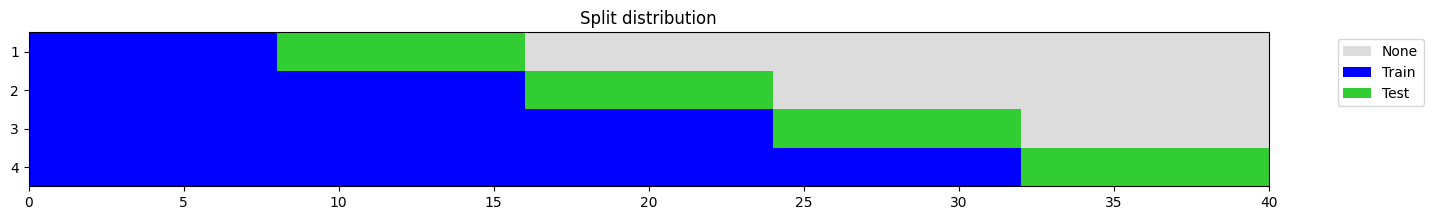

In [5]:
train_test_splits = get_walk_forward_splits(X, n_splits=4, anchored=True, valid_size=0.2, show_plot=True)

In [6]:
print(X.shape)

print(train_test_splits[0])

(40, 84, 71)
([0, 1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15])


In [7]:
X_training_sets = []
X_validation_sets = []
#X_test_sets = []

y_training_sets = []
y_validation_sets = []
#y_test_sets = []

for X_train_indexes, X_valid_indexes in train_test_splits:
    X_train, X_valid= X[:len(X_train_indexes) - 1], X[len(X_train_indexes) - 1:len(X_train_indexes)+len(X_valid_indexes) - 1]
    print(X_train.shape, X_valid.shape)

    y_train, y_valid = y[:len(X_train_indexes) - 1], y[len(X_train_indexes) - 1:len(X_train_indexes)+len(X_valid_indexes) - 1]

    print(X_train_indexes, X_valid_indexes)
    X_training_sets.append(X_train)
    X_validation_sets.append(X_valid)
    #X_test_sets.append(X_test)

    y_training_sets.append(y_train) 
    y_validation_sets.append(y_valid)
    #y_test_sets.append(y_test)


(7, 84, 71) (8, 84, 71)
[0, 1, 2, 3, 4, 5, 6, 7] [8, 9, 10, 11, 12, 13, 14, 15]
(15, 84, 71) (8, 84, 71)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [16, 17, 18, 19, 20, 21, 22, 23]
(23, 84, 71) (8, 84, 71)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [24, 25, 26, 27, 28, 29, 30, 31]
(31, 84, 71) (8, 84, 71)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] [32, 33, 34, 35, 36, 37, 38, 39]


In [8]:
from torch import nn

tfms  = [[Categorize()], [Categorize()]]

dataset_num = len(X_training_sets)
print(dataset_num)

data_loaders = []

for i in range(dataset_num):
    train_set = TSDataset(np.array(X_training_sets[i]), np.array(y_training_sets[i]).astype(int) - 1, types=(TSTensor, TSLabelTensor))
    valid_set = TSDataset(np.array(X_validation_sets[i]), np.array(y_validation_sets[i]).astype(int) - 1, types=(TSTensor, TSLabelTensor))
    #test_set = TSDataset(np.array(X_test_sets[i]), np.array(y_test_sets[i]).astype(int) - 1, types=(TSTensor, TSLabelTensor))
    
    dls = TSDataLoaders.from_dsets(train_set, valid_set, device=default_device(), shuffle_train=False, batch_tfms=[TSStandardize()], tfms=tfms)
    data_loaders.append(dls)

c = len(np.unique(y_train))
print(c)

#TSClassifier(X=X, y=y, splits=train_test_splits, arch='InceptionTimePlus', metrics=accuracy)

#dsets = TSDataset(X, y)
#dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], num_workers=0)

4
8


In [9]:
model_list = []

print(np.shape(X_training_sets[0])[2])

for j in range(dataset_num):
    print(X_training_sets[j][0])
    model = TCN(c_in=84, c_out=8, fc_dropout=0.5, conv_dropout=0.5)
    model_list.append(model)

71
[[-4.20626887e-07 -2.11508114e-07  4.13973161e-08 ... -5.93696549e-06
  -5.93957077e-06 -6.06476801e-06]
 [-2.74862195e-07 -2.69035888e-07  4.25818899e-08 ... -6.19615108e-06
  -6.05833692e-06 -6.04609706e-06]
 [ 5.07894220e-07  2.56187375e-07  2.25365189e-08 ... -1.03474028e-05
  -1.02211907e-05 -1.03041404e-05]
 ...
 [-5.34637329e-08 -3.89319159e-08 -1.01722965e-08 ...  1.05522657e-06
   1.00475701e-06  1.00898113e-06]
 [ 2.67234718e-07  8.25957084e-08 -3.38746179e-08 ... -1.15164755e-07
  -1.39063492e-07 -1.31121675e-07]
 [-3.73725228e-07 -1.41618042e-07  4.05821872e-08 ... -2.02237834e-07
  -2.86638614e-07 -1.97888153e-07]]
[[-4.20626887e-07 -2.11508114e-07  4.13973161e-08 ... -5.93696549e-06
  -5.93957077e-06 -6.06476801e-06]
 [-2.74862195e-07 -2.69035888e-07  4.25818899e-08 ... -6.19615108e-06
  -6.05833692e-06 -6.04609706e-06]
 [ 5.07894220e-07  2.56187375e-07  2.25365189e-08 ... -1.03474028e-05
  -1.02211907e-05 -1.03041404e-05]
 ...
 [-5.34637329e-08 -3.89319159e-08 -1.0172

epoch,train_loss,valid_loss,accuracy,time
0,2.085188,2.082145,0.125000,00:00
1,2.084915,2.082042,0.125000,00:00
2,2.084405,2.081773,0.125000,00:00
3,2.083386,2.081267,0.125000,00:00
4,2.081618,2.080500,0.125000,00:00
5,2.078784,2.079492,0.125000,00:00
6,2.074384,2.078183,0.250000,00:00
7,2.067828,2.076243,0.125000,00:00
8,2.058499,2.073824,0.000000,00:00
9,2.045642,2.072207,0.125000,00:00


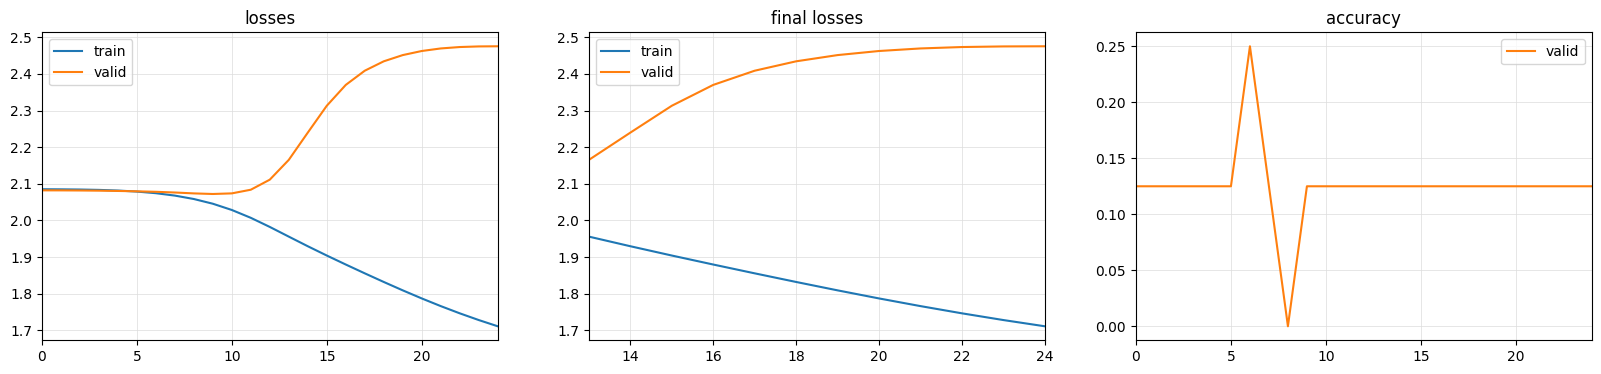

epoch,train_loss,valid_loss,accuracy,time
0,2.087508,2.081209,0.125000,00:00
1,2.087289,2.081202,0.125000,00:00
2,2.086869,2.081210,0.125000,00:00
3,2.086046,2.081315,0.125000,00:00
4,2.084693,2.081915,0.125000,00:00
5,2.082677,2.083777,0.125000,00:00
6,2.079736,2.087891,0.000000,00:00
7,2.075475,2.095827,0.000000,00:00
8,2.069521,2.111028,0.125000,00:00
9,2.061464,2.139722,0.125000,00:00


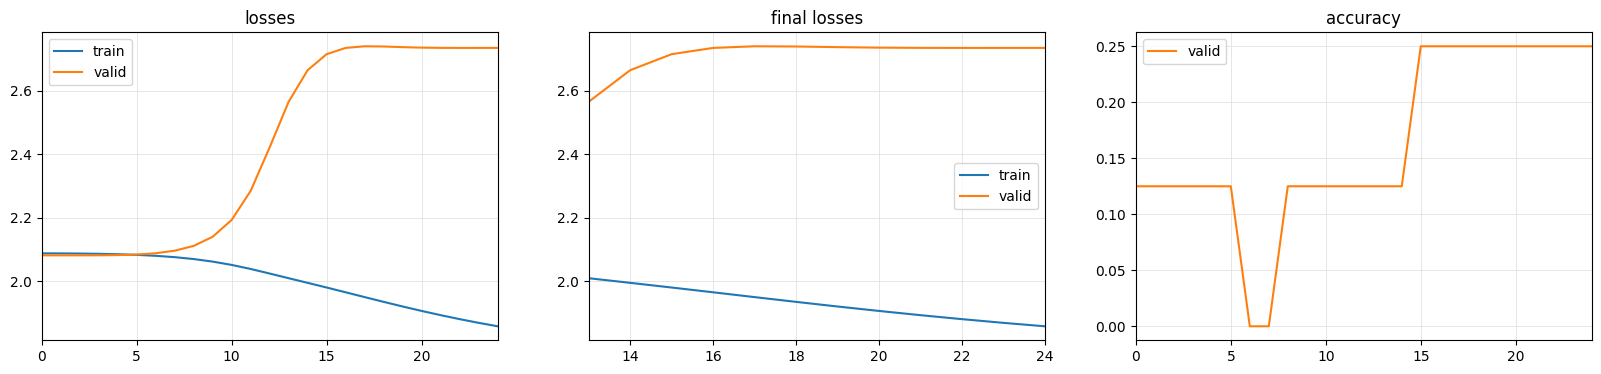

epoch,train_loss,valid_loss,accuracy,time
0,2.089039,2.086855,0.125000,00:00
1,2.088914,2.086779,0.125000,00:00
2,2.088677,2.086627,0.125000,00:00
3,2.088225,2.086344,0.125000,00:00
4,2.087492,2.085635,0.125000,00:00
5,2.086407,2.084548,0.125000,00:00
6,2.084833,2.082998,0.125000,00:00
7,2.082603,2.080612,0.125000,00:00
8,2.079556,2.077219,0.125000,00:00
9,2.075471,2.072555,0.125000,00:00


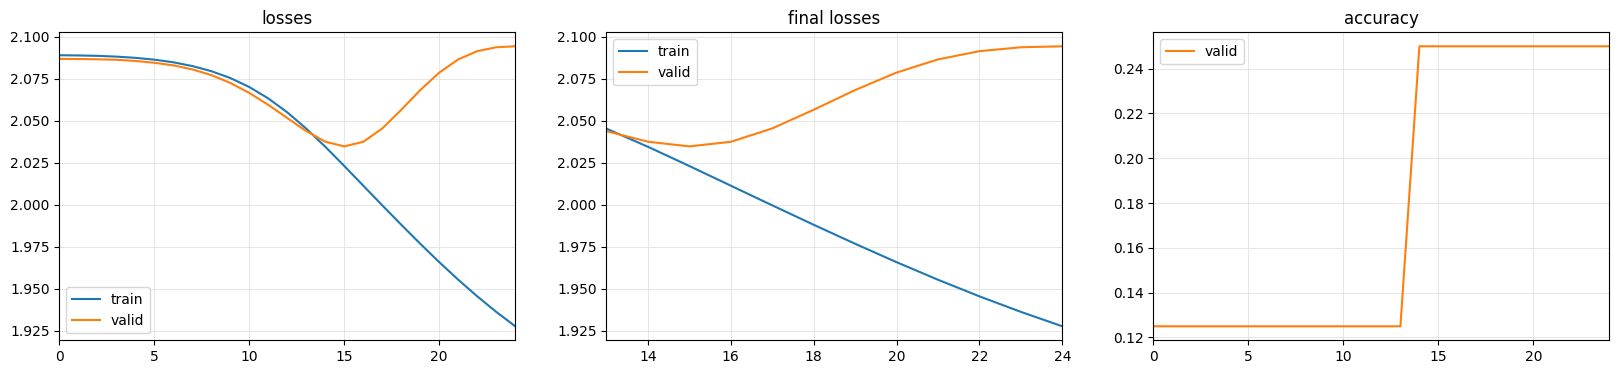

epoch,train_loss,valid_loss,accuracy,time
0,2.081617,2.085455,0.125000,00:00
1,2.081511,2.085496,0.125000,00:00
2,2.081306,2.085613,0.125000,00:00
3,2.080914,2.085884,0.125000,00:00
4,2.080286,2.086024,0.000000,00:00
5,2.079394,2.086073,0.125000,00:00
6,2.078171,2.086795,0.125000,00:00
7,2.076511,2.088446,0.125000,00:00
8,2.074282,2.091933,0.125000,00:00
9,2.071333,2.098420,0.125000,00:00


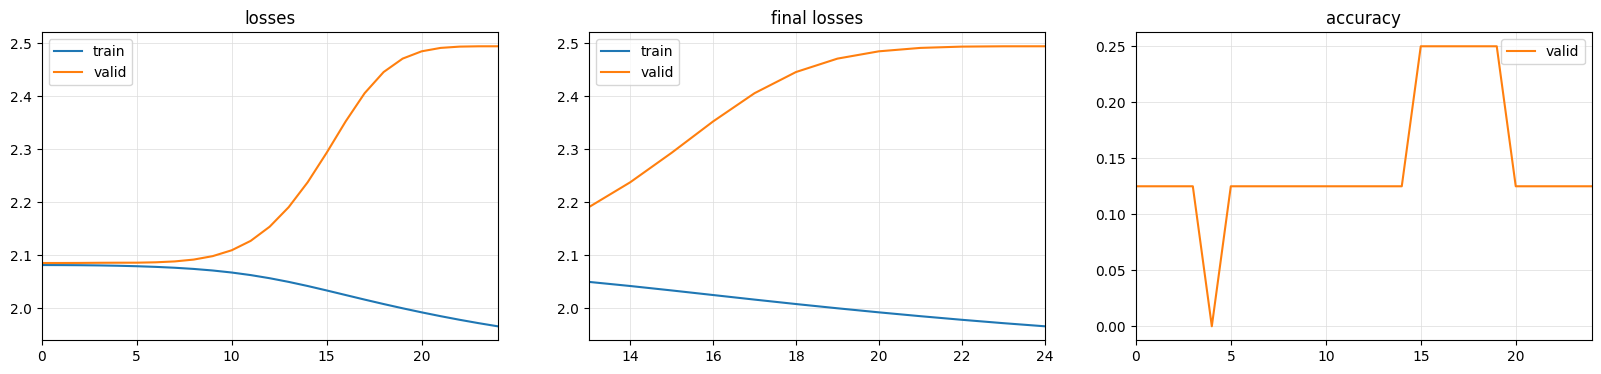

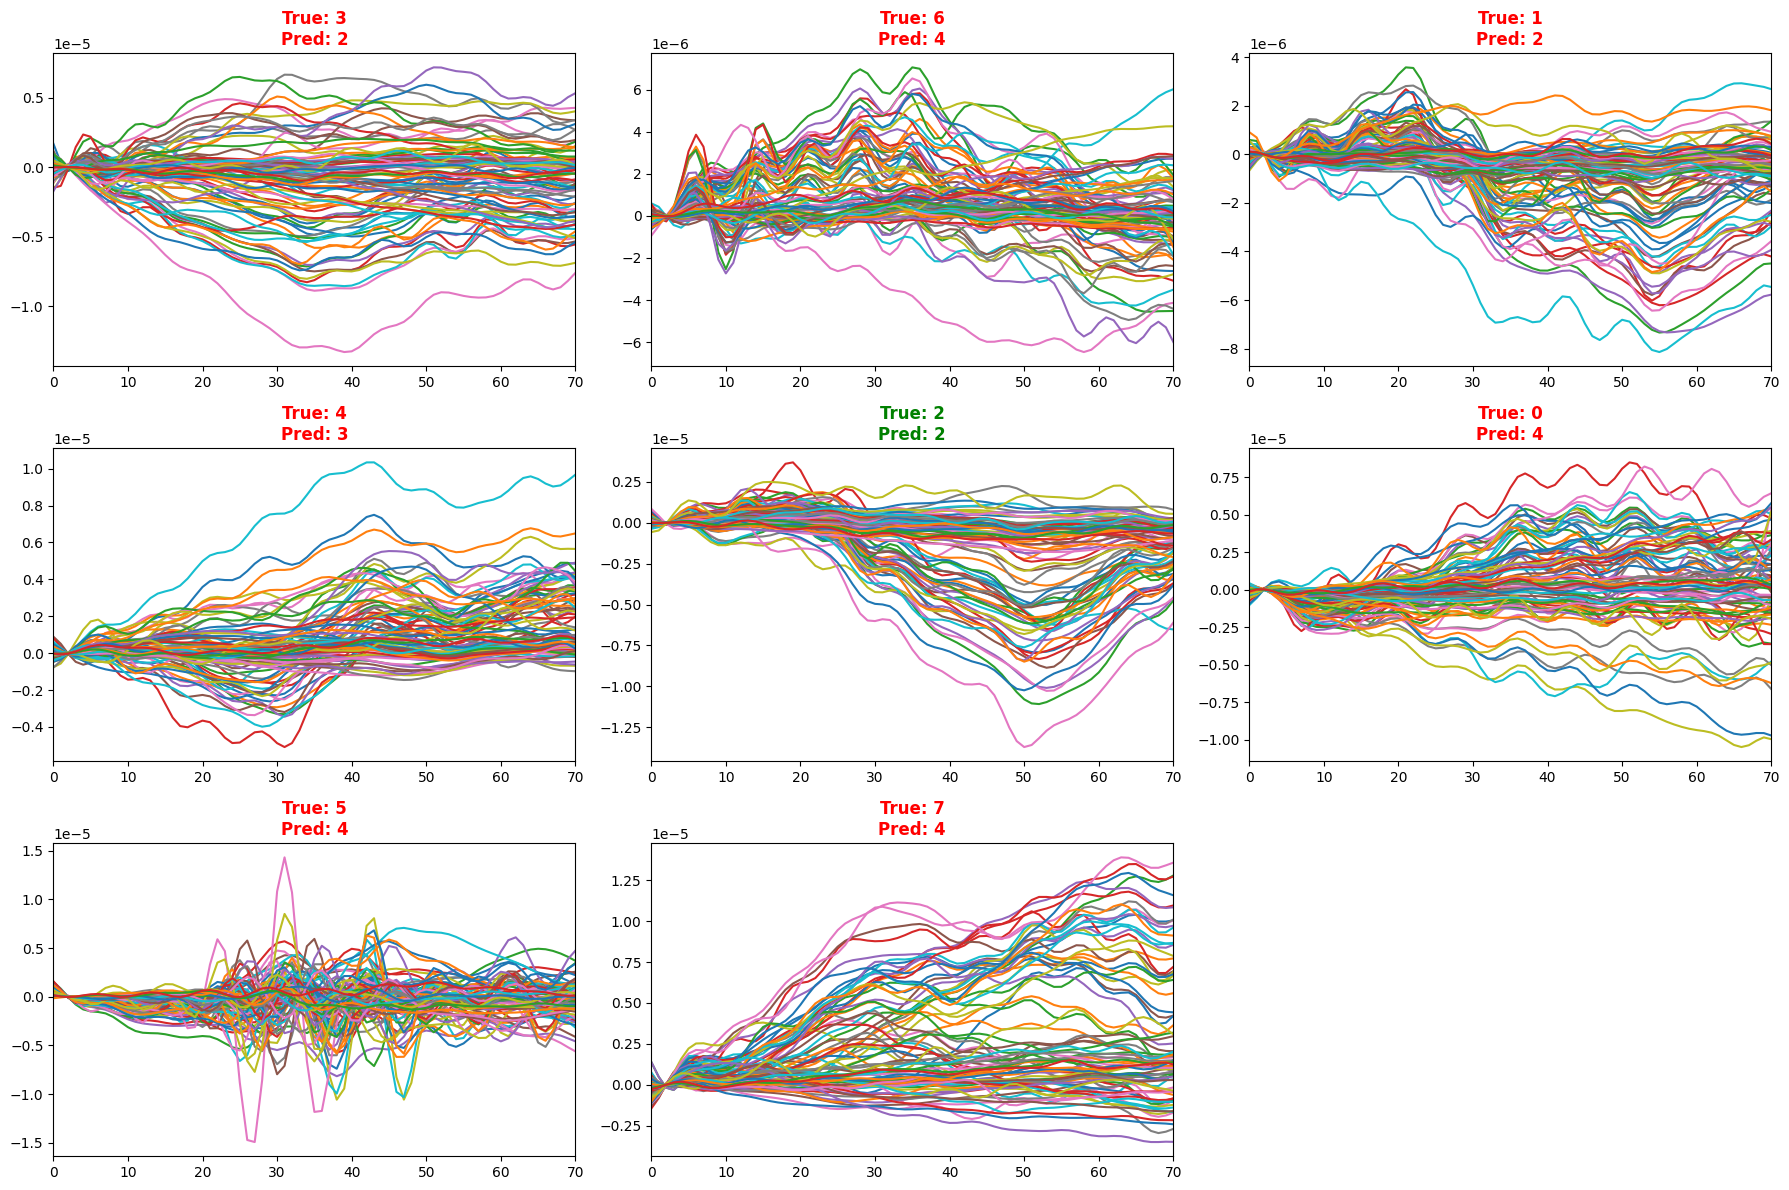

In [27]:
import os

pth = os.path.join(os.getcwd(), "weights.pth")

for k in range(dataset_num):
    if(k == 0):
        new_model = build_ts_model(arch=TCN, dls=data_loaders[k], c_in=84, c_out=8, seq_len=84)
    else:
        new_model = build_ts_model(arch=TCN, dls=data_loaders[k], c_in=84, c_out=8, seq_len=84, weights_path=pth)

    learn = Learner(data_loaders[k], new_model, metrics=accuracy, loss_func=CrossEntropyLossFlat())

    learn.fit_one_cycle(25, 1e-3)

    learn.recorder.plot_metrics()

    if(k != dataset_num - 1):
        os.remove(pth)
        with open(pth, 'wb') as f:
            torch.save(new_model, f)
        #model_list[k+1].load_state_dict(model_list[k].state_dict())

learn.show_results()